## Predicting Bike Rental Count: A Simple TensorFlow Regression
This notebook demonstrates a fundamental machine learning project: building a simple regression model with TensorFlow to predict bike rental count on daily based on the environmental and seasonal settings. It's a hands-on introduction to a complete ML workflow.

We'll cover:
- Data Loading and Cleaning: Loading the kaggle dataset and cleaning it for training and  testing.
- Data Visualization: Using Seaborn to plot the relationship.
- Model Building & Training: Constructing and training a basic TensorFlow 2.19.0 sequential model.
- Loss Monitoring: Visualizing training loss over epochs.
- Prediction & Evaluation: Testing the trained model's accuracy.

Required Libraries:
- tensorflow==2.19.0
- numpy==2.2.6
- seaborn==2.1.3
- pandas==2.2.3
- scikit-learn==1.6.1

Let's get started!

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow  as tf
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load Dataset

Attribute Information:
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

for further more information please go through the following link,
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [2]:
# Loading bike_sharing_daily Dataset
df = pd.read_csv("../data/bike_sharing_daily.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## 3. Clean Dataset

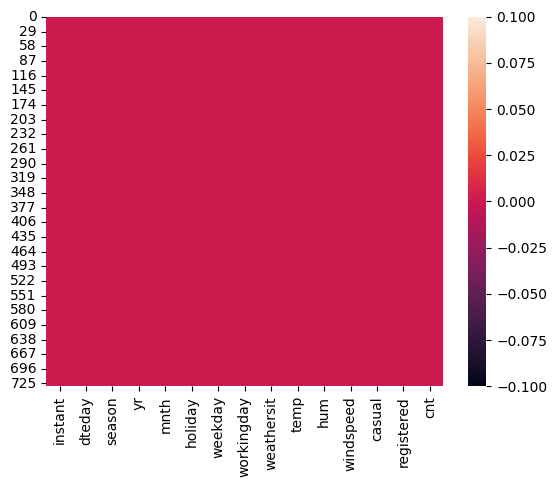

In [5]:
# Checking for null values
sns.heatmap(df.isnull());

In [ ]:
# Dropping extra columns from the dataset
df = df.drop(labels=["instant","casual","registered"],axis=1)

In [7]:
# Converting "dteday" column to datatime format
df.dteday = pd.to_datetime(df.dteday, format = '%m/%d/%Y')

In [8]:
# Making "dteday" column index for visulaziation later
df.index = pd.DatetimeIndex(df.dteday)
df = df.drop(labels=["dteday"],axis=1)

In [9]:
# Final clean dataset
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


## 4. Visualize Clean Dataset

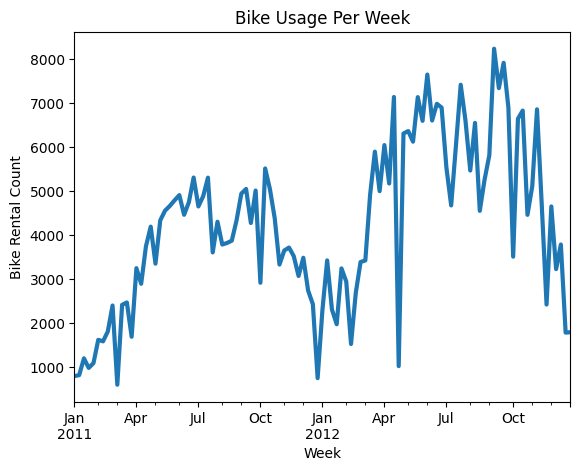

In [10]:
# Bike Usage Per Week
df.cnt.asfreq("W").plot(linewidth=3)
plt.title("Bike Usage Per Week")
plt.xlabel('Week')
plt.ylabel('Bike Rental Count');

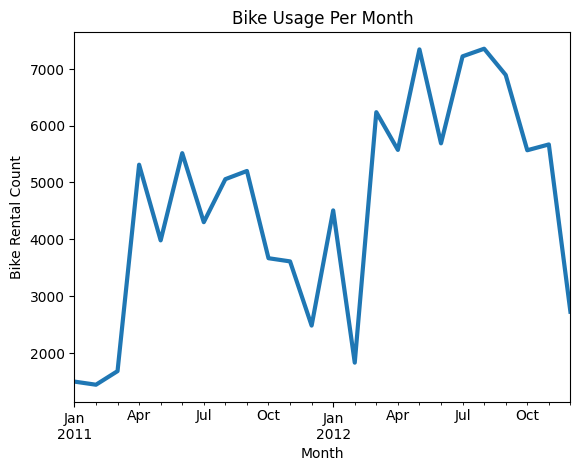

In [11]:
# Bike Usage Per Month
df.cnt.asfreq("ME").plot(linewidth=3)
plt.title("Bike Usage Per Month")
plt.xlabel('Month')
plt.ylabel('Bike Rental Count');

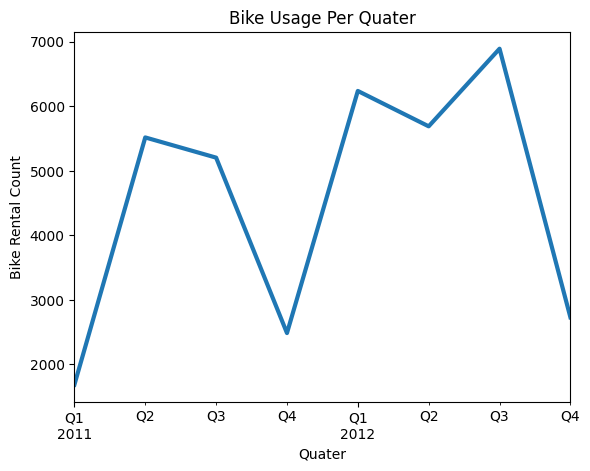

In [12]:
# Bike Usage Per Year
df.cnt.asfreq("QE").plot(linewidth=3)
plt.title("Bike Usage Per Quater")
plt.xlabel('Quater')
plt.ylabel('Bike Rental Count');

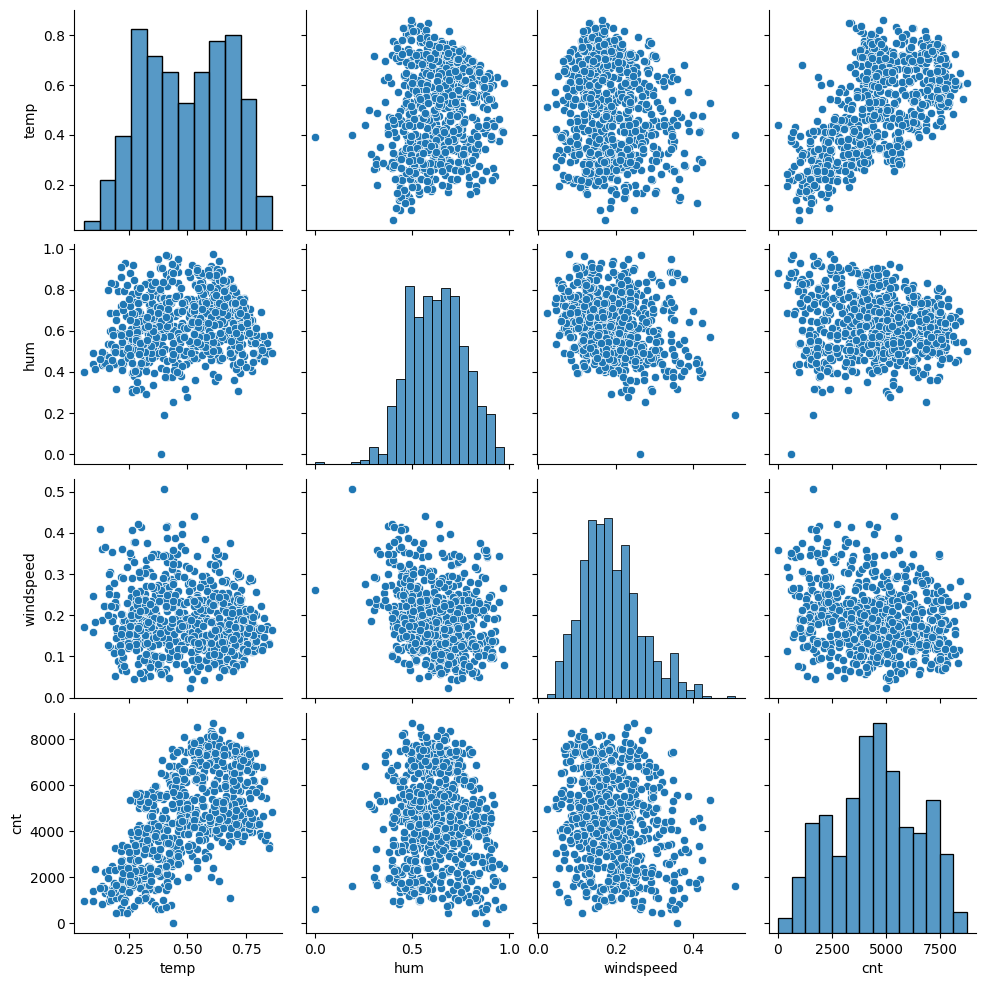

In [13]:
# Investigating  trends among numerical columns
num_cont_cols = ["temp", "hum", "windspeed","cnt"]
sns.pairplot(df[num_cont_cols]);

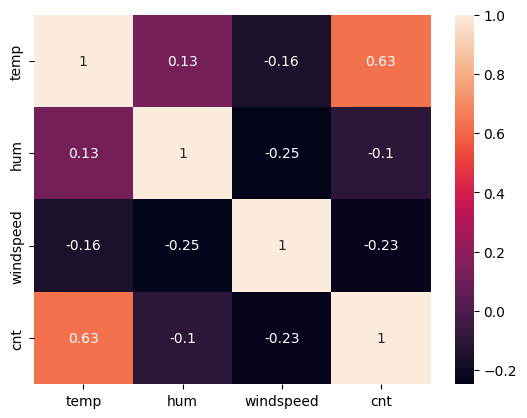

In [14]:
# Investigating  correlation among numerical columns
sns.heatmap(df[num_cont_cols].corr(),annot=True);

## 6. Create Training and Testing Dataset

In [15]:
num_cont_cols = ["temp", "hum", "windspeed","cnt"]
cat_nominal_cols = ["season","yr","mnth" ,"holiday","weekday","workingday","weathersit"]

Encoding categorical columns to better represent their nature

In [16]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
X_cat = ohe.fit_transform(df[cat_nominal_cols]).toarray()
X_cat = pd.DataFrame(X_cat)
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


merging processed numerical and categorical column

In [17]:
X_num = df[num_cont_cols].reset_index()
X_all = pd.concat([X_cat,X_num], axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600


In [18]:
X_all = X_all.drop(labels=["dteday"],axis=1)
X, y = X_all.iloc[:,:-1].values, X_all.iloc[:,-1:].values
X.shape, y.shape

((731, 35), (731, 1))

Scaling target column to improve model performance

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y = scaler.fit_transform(y)
print("Warning: Transforming before test_train split can result in data leakage.")

Spliting dataset into train and test set

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 35), (147, 35), (584, 1), (147, 1))

## 7.  Build and Train Model

In [33]:
model = tf.keras.models.Sequential();

model.add(tf.keras.layers.Dense(units=100, activation="relu", input_shape=[35]))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))
model.summary();

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,901 (93.36 KB)

 Trainable params: 23,901 (93.36 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='Adam',loss="mean_squared_error")
epochs_hist  = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_split=0.2,verbose=0)

## 8. Model Training Summary

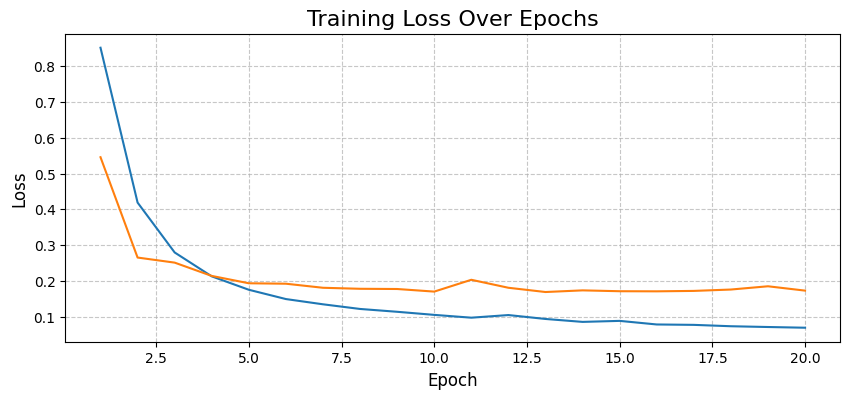

In [23]:
plt.figure(figsize=(10, 4)) 
sns.lineplot(x=range(1, len(epochs_hist.history['loss']) + 1), y=epochs_hist.history['loss'])
sns.lineplot(x=range(1, len(epochs_hist.history['val_loss']) + 1), y=epochs_hist.history['val_loss'])
plt.title('Training Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [24]:
# model.get_weights()

## 5. Evaluate Model

In [25]:
# Predicting Bike Rental Usage for X_test set
y_pred = model.predict(X_test)

# Rescaling values to original scale
y_pred = scaler.inverse_transform(y_pred)[:,-1]
y_test = scaler.inverse_transform(y_test)[:,-1]


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


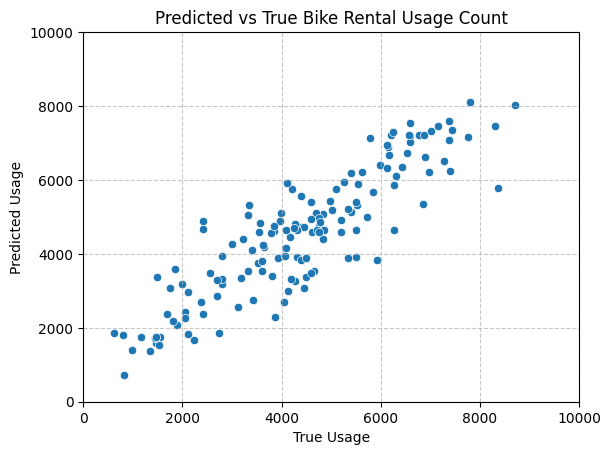

In [31]:
sns.scatterplot(y=y_pred,x=y_test)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Predicted vs True Bike Rental Usage Count")
plt.xlabel("True Usage")
plt.ylabel("Predicted Usage");

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

n,k =  X_test.shape[0], X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print(f"--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Adjusted R-squared (ADJ_R2): {adj_r2:.4f}")
print(f"------------------------")

--- Model Evaluation ---
Mean Squared Error (MSE): 744483.8316
Root Mean Squared Error (RMSE): 862.8348
Mean Absolute Error (MAE): 744483.8316
R-squared (R2): 0.7454
Adjusted R-squared (ADJ_R2): 0.6651
------------------------
